# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
import numpy as np
import os
# from scipy.misc import imread, imresize
import skimage.transform
import imageio
import datetime
import os

We set the random seed so that the results don't vary drastically.

In [3]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [4]:
train_doc = np.random.permutation(open('C:\\train.csv').readlines())
val_doc = np.random.permutation(open('C:\\val.csv').readlines())
batch_size = 40#experiment with the batch size

In [5]:
# Display all the files under the train folder as a spot check
source_path='C:\\Project_data'
train_file=source_path+"/train.csv"

with open(train_file) as f:
    lines = f.readlines()
    for line in lines:
      print(line)

WIN_20180925_17_08_43_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_18_28_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_18_56_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_19_51_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_20_14_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_21_28_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_22_55_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_24_49_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_26_25_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_26_51_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_27_40_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_29_52_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_33_08_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_35_39_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_37_08_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_37_30_Pro_Left_Swipe_new;Left_Swipe_new;0

WIN_20180925_17_39_25_Pro_Left_Swipe_new;Left_Swipe_new;

## Data Analysis
Verify the Shape of the training images

#### Sample Resized Image (120 * 160) of Stop Gesture :

(360, 360, 3)
(120, 160, 3)


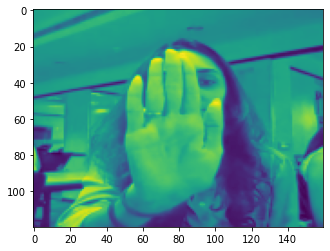

[[0.00221453 0.00221453 0.00221453 ... 0.0016609  0.0016782  0.00169166]
 [0.00219915 0.00219915 0.00220108 ... 0.00167628 0.0016782  0.00169166]
 [0.00219915 0.00219915 0.00219915 ... 0.00169166 0.00169166 0.00169166]
 ...
 [0.00042484 0.0007747  0.00081507 ... 0.00115917 0.00124952 0.00134371]
 [0.00037678 0.00069589 0.00088812 ... 0.00100154 0.00107651 0.00112841]
 [0.00030181 0.00037678 0.00051326 ... 0.00084775 0.00089196 0.00090734]]


In [7]:
img_name = 'C:\\train/WIN_20180907_16_00_27_Pro_Stop Gesture_new/WIN_20180907_16_00_27_Pro_00054.png'
image = imageio.imread(img_name)

# Original size of the image
print(image.shape)
resized = skimage.transform.resize(image, (120,160))

# Image size after resize
print(resized.shape)
import matplotlib.pyplot as plt
plt.imshow(resized[:, : , 0])
plt.show()
print(resized[:, : , 0]/255)

#### Sample Resized Image (120 * 160) of Thumbs Up Gesture :

(120, 160, 3)
(120, 160, 3)


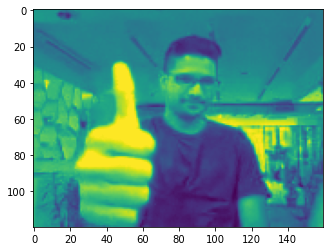

[[0.00221453 0.0021684  0.0021684  ... 0.00173779 0.00178393 0.00176855]
 [0.00218378 0.00218378 0.00218378 ... 0.00173779 0.00179931 0.00178393]
 [0.00222991 0.00222991 0.00221453 ... 0.00176855 0.00176855 0.00172241]
 ...
 [0.00261438 0.00236832 0.00235294 ... 0.00244521 0.00246059 0.00252211]
 [0.002599   0.00241446 0.00235294 ... 0.00247597 0.00256824 0.00262976]
 [0.00261438 0.00239908 0.00235294 ... 0.00249135 0.00256824 0.00262976]]


In [8]:
img_name = 'C:\\Project_data\\train/WIN_20180925_17_20_16_Pro_Thumbs_Up_new/WIN_20180925_17_20_16_Pro_00033.png'
image = imageio.imread(img_name)

# Original size of the image
print(image.shape)
resized = skimage.transform.resize(image, (120,160))

# Image size after resize
print(resized.shape)
import matplotlib.pyplot as plt
plt.imshow(resized[:, : , 0])
plt.show()
print(resized[:, : , 0]/255)

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [10]:
def generator(source_path, folder_list, batch_size):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    # img_idx = [i for i in range(0, 30) if i % 3 != 0]
    img_idx = [i for i in range(0, 30)] #create a list of image numbers you want to use for a particular video
    while True:
        t = np.random.permutation(folder_list)
        num_batches = int(len(t)/batch_size) # calculate the number of batches
        for batch in range(num_batches): # we iterate over the number of batches
            batch_data = np.zeros((batch_size,30,120,160,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = imageio.imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes

                    if image.shape[0] == 360:
                      # in case of 360 X 360 , resize the image to 120X160
                      resized = skimage.transform.resize(image, (120,160))
                    else:
                      # in case of 120 X 160 , crop the image to 120X160
                      resized = image[0:120,0:160]
                    
                    batch_data[folder,idx,:,:,0] = resized[:, : , 0]/255#normalise and feed in the image
                    batch_data[folder,idx,:,:,1] = resized[:, : , 1]/255#normalise and feed in the image
                    batch_data[folder,idx,:,:,2] = resized[:, : , 2]/255#normalise and feed in the image
                    
                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do

        
        # write the code for the remaining data points which are left after full batches
        remaining = len(t) - num_batches*batch_size
        if remaining > 0:
            batch_data = np.zeros((remaining,30,120,160,3))
            batch_labels = np.zeros((remaining,5))
            for folder in range(remaining):
                imgs = os.listdir(source_path+"/"+t[num_batches*batch_size + folder].split(';')[0])
                for idx,item in enumerate(img_idx):
                #for i in imgs:
                    image = imageio.imread(source_path+"/"+t[num_batches*batch_size + folder].split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    
                    #resized = imresize(image, (120,160))
                    
                    if image.shape[0] == 360:
                      # in case of 360 X 360 , resize the image to 120X120
                      resized = skimage.transform.resize(image, (120,160))
                    else:
                      # in case of 120 X 160 , crop the image to 120X160
                      resized = image[0:120,0:160]
                    
                    batch_data[folder,idx,:,:,0] = resized[:, : , 0]/255
                    batch_data[folder,idx,:,:,1] = resized[:, : , 1]/255
                    batch_data[folder,idx,:,:,2] = resized[:, : , 2]/255

                batch_labels[folder, int(t[folder + num_batches*batch_size].strip().split(';')[2])] = 1
            yield batch_data, batch_labels


In [11]:
# Show the resized image shape
print(resized.shape)

(120, 160, 3)


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [12]:
curr_dt_time = datetime.datetime.now()
train_path = 'C:\\Project_data\\train'
val_path = 'C:\\Project_data\\val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 40 # choose the number of epochs
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 40


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

## Model-1 : Conv3D

In [13]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam


In [14]:
#write your model here
model = Sequential()

model.add(Conv3D(
    8, (3,3,3), input_shape=(30,120,160,3),
    padding='same'))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv3D(8, (3,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))


model.add(Conv3D(16, (3,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv3D(16, (3,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))


model.add(Conv3D(32, (3,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))

model.add(Conv3D(64, (3,3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling3D(pool_size=(2, 2, 2)))


model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(5, activation='softmax'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 30, 120, 160, 8)   656       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 120, 160, 8)   32        
_________________________________________________________________
activation (Activation)      (None, 30, 120, 160, 8)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 30, 120, 160, 8)   1736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 120, 160, 8)   32        
_________________________________________________________________
activation_1 (Activation)    (None, 30, 120, 160, 8)   0         
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 15, 60, 80, 8)     0

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

#### Optimizer Applied: Adam

In [15]:
optimiser = Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 30, 120, 160, 8)   656       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 120, 160, 8)   32        
_________________________________________________________________
activation (Activation)      (None, 30, 120, 160, 8)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 30, 120, 160, 8)   1736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 120, 160, 8)   32        
_________________________________________________________________
activation_1 (Activation)    (None, 30, 120, 160, 8)   0         
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 15, 60, 80, 8)     0

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

In [16]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)

In [17]:
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, cooldown=1, verbose=1)# write the REducelronplateau code here
callbacks_list = [checkpoint, LR]


The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [18]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1
    
print ('steps_per_epoch: %d' % steps_per_epoch)
print ('validation_steps: %d' % validation_steps)

steps_per_epoch: 17
validation_steps: 3


Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [19]:
model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  C:\Users\Vinod\Downloads\upgrad\Deep Learning\Gesture Recognition Assignment\Project_data\train ; batch size = 40
Epoch 1/40
17/17 [==============================] - ETA: 0s - loss: 2.1217 - categorical_accuracy: 0.2394 WARNING:tensorflow:Can save best model only with val_loss available, skipping.
Source path =  C:\Users\Vinod\Downloads\upgrad\Deep Learning\Gesture Recognition Assignment\Project_data\val ; batch size = 40
17/17 [==============================] - 771s 45s/step - loss: 2.1075 - categorical_accuracy: 0.2424 - val_loss: 1.8522 - val_categorical_accuracy: 0.2100
Epoch 2/40
17/17 [==============================] - 770s 45s/step - loss: 1.4488 - categorical_accuracy: 0.4191 - val_loss: 3.2816 - val_categorical_accuracy: 0.2200
Epoch 3/40
17/17 [==============================] - 760s 45s/step - loss: 1.2683 - categorical_accuracy: 0.4949 - val_loss: 4.3197 - val_categorical_accuracy: 0.2000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.000500000023

17/17 [==============================] - 766s 45s/step - loss: 0.7575 - categorical_accuracy: 0.6968 - val_loss: 5.3483 - val_categorical_accuracy: 0.1900
Epoch 7/40
17/17 [==============================] - 770s 45s/step - loss: 0.6409 - categorical_accuracy: 0.7679 - val_loss: 5.4775 - val_categorical_accuracy: 0.2100

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 8/40
17/17 [==============================] - 764s 45s/step - loss: 0.6262 - categorical_accuracy: 0.7493 - val_loss: 5.8358 - val_categorical_accuracy: 0.1800
Epoch 9/40
17/17 [==============================] - 769s 45s/step - loss: 0.5755 - categorical_accuracy: 0.8203 - val_loss: 4.9539 - val_categorical_accuracy: 0.2400

Epoch 00009: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 10/40
17/17 [==============================] - 765s 45s/step - loss: 0.5380 - categorical_accuracy: 0.8112 - val_loss: 4.7980 - val_categorical_accuracy: 0.2100
Epoch 11/40
 3/17 [

17/17 [==============================] - 760s 45s/step - loss: 0.5384 - categorical_accuracy: 0.8341 - val_loss: 4.7877 - val_categorical_accuracy: 0.1900

Epoch 00011: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 12/40
17/17 [==============================] - 764s 45s/step - loss: 0.5236 - categorical_accuracy: 0.8174 - val_loss: 4.3491 - val_categorical_accuracy: 0.2400
Epoch 13/40
17/17 [==============================] - 765s 45s/step - loss: 0.5179 - categorical_accuracy: 0.8098 - val_loss: 4.2618 - val_categorical_accuracy: 0.2100

Epoch 00013: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 14/40
17/17 [==============================] - 765s 45s/step - loss: 0.5004 - categorical_accuracy: 0.8259 - val_loss: 3.9823 - val_categorical_accuracy: 0.2100
Epoch 15/40
17/17 [==============================] - 766s 45s/step - loss: 0.5381 - categorical_accuracy: 0.8004 - val_loss: 3.6293 - val_categorical_accuracy: 0.2200

Epoch 00015: 

17/17 [==============================] - 765s 45s/step - loss: 0.4597 - categorical_accuracy: 0.8397 - val_loss: 3.4451 - val_categorical_accuracy: 0.2100
Epoch 17/40
17/17 [==============================] - 772s 45s/step - loss: 0.4640 - categorical_accuracy: 0.8211 - val_loss: 3.4303 - val_categorical_accuracy: 0.1800

Epoch 00017: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
Epoch 18/40
17/17 [==============================] - 764s 45s/step - loss: 0.4893 - categorical_accuracy: 0.8415 - val_loss: 2.8885 - val_categorical_accuracy: 0.2400
Epoch 19/40
17/17 [==============================] - 764s 45s/step - loss: 0.4459 - categorical_accuracy: 0.8707 - val_loss: 2.6177 - val_categorical_accuracy: 0.2500

Epoch 00019: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
Epoch 20/40
17/17 [==============================] - 765s 45s/step - loss: 0.4642 - categorical_accuracy: 0.8585 - val_loss: 2.5094 - val_categorical_accuracy: 0.2900
Epoch 21/40
 7

17/17 [==============================] - 773s 46s/step - loss: 0.4849 - categorical_accuracy: 0.8280 - val_loss: 2.1161 - val_categorical_accuracy: 0.3400

Epoch 00021: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.
Epoch 22/40
17/17 [==============================] - 772s 45s/step - loss: 0.4838 - categorical_accuracy: 0.8411 - val_loss: 1.7928 - val_categorical_accuracy: 0.4100
Epoch 23/40
17/17 [==============================] - 765s 45s/step - loss: 0.4932 - categorical_accuracy: 0.8358 - val_loss: 1.5359 - val_categorical_accuracy: 0.4600


Epoch 24/40
17/17 [==============================] - 769s 45s/step - loss: 0.4920 - categorical_accuracy: 0.8412 - val_loss: 1.3712 - val_categorical_accuracy: 0.5500
Epoch 25/40
17/17 [==============================] - 770s 45s/step - loss: 0.4402 - categorical_accuracy: 0.8409 - val_loss: 1.1987 - val_categorical_accuracy: 0.6200
Epoch 26/40
11/17 [==================>...........] - ETA: 4:28 - loss: 0.4381 - categorical_accuracy: 0.8517WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 769s 45s/step - loss: 0.4514 - categorical_accuracy: 0.8448 - val_loss: 1.0772 - val_categorical_accuracy: 0.6000
Epoch 27/40
17/17 [==============================] - 766s 45s/step - loss: 0.4406 - categorical_accuracy: 0.8640 - val_loss: 0.9965 - val_categorical_accuracy: 0.6500
Epoch 28/40
17/17 [==============================] - 765s 45s/step - loss: 0.4531 - categorical_accuracy: 0.8591 - val_loss: 0.8689 - val_categorical_accuracy: 0.6800
Epoch 29/40
 4/17 [======>.......................] - ETA: 9:38 - loss: 0.3908 - categorical_accuracy: 0.8865 WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 765s 45s/step - loss: 0.4234 - categorical_accuracy: 0.8674 - val_loss: 0.7662 - val_categorical_accuracy: 0.7200
Epoch 30/40
17/17 [==============================] - 763s 45s/step - loss: 0.5031 - categorical_accuracy: 0.8223 - val_loss: 0.7520 - val_categorical_accuracy: 0.7300
Epoch 31/40
15/17 [=========================>....] - ETA: 1:28 - loss: 0.4710 - categorical_accuracy: 0.8374WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 767s 45s/step - loss: 0.4695 - categorical_accuracy: 0.8400 - val_loss: 0.6936 - val_categorical_accuracy: 0.7400
Epoch 32/40
17/17 [==============================] - 776s 46s/step - loss: 0.4608 - categorical_accuracy: 0.8362 - val_loss: 0.7136 - val_categorical_accuracy: 0.7400
Epoch 33/40
17/17 [==============================] - 765s 45s/step - loss: 0.4824 - categorical_accuracy: 0.8274 - val_loss: 0.6393 - val_categorical_accuracy: 0.7800
Epoch 34/40
 8/17 [=============>................] - ETA: 6:41 - loss: 0.4835 - categorical_accuracy: 0.8731WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 769s 45s/step - loss: 0.4954 - categorical_accuracy: 0.8587 - val_loss: 0.6034 - val_categorical_accuracy: 0.7800
Epoch 35/40
17/17 [==============================] - 769s 45s/step - loss: 0.4989 - categorical_accuracy: 0.8299 - val_loss: 0.5640 - val_categorical_accuracy: 0.8100
Epoch 36/40
17/17 [==============================] - 770s 45s/step - loss: 0.4724 - categorical_accuracy: 0.8528 - val_loss: 0.5603 - val_categorical_accuracy: 0.8100
Epoch 37/40
 1/17 [>.............................] - ETA: 11:57 - loss: 0.3982 - categorical_accuracy: 0.9000WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 767s 45s/step - loss: 0.4564 - categorical_accuracy: 0.8581 - val_loss: 0.5639 - val_categorical_accuracy: 0.8000
Epoch 38/40
17/17 [==============================] - 772s 45s/step - loss: 0.4916 - categorical_accuracy: 0.8432 - val_loss: 0.5287 - val_categorical_accuracy: 0.8500
Epoch 39/40
12/17 [====================>.........] - ETA: 3:42 - loss: 0.4480 - categorical_accuracy: 0.8846WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 764s 45s/step - loss: 0.4478 - categorical_accuracy: 0.8757 - val_loss: 0.5585 - val_categorical_accuracy: 0.8100
Epoch 40/40
17/17 [==============================] - 765s 45s/step - loss: 0.4871 - categorical_accuracy: 0.8337 - val_loss: 0.5428 - val_categorical_accuracy: 0.8200

Epoch 00040: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.


## Model-2 : CNN + RNN (GRU)

In [20]:
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Reshape, Lambda
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Conv2D, LSTM, TimeDistributed, Flatten, Input, GRU, GlobalAveragePooling2D

In [21]:
if (num_train_sequences%batch_size) == 0:
    steps_per_epoch = int(num_train_sequences/batch_size)
else:
    steps_per_epoch = (num_train_sequences//batch_size) + 1

if (num_val_sequences%batch_size) == 0:
    validation_steps = int(num_val_sequences/batch_size)
else:
    validation_steps = (num_val_sequences//batch_size) + 1

print ('steps_per_epoch %d' % steps_per_epoch)
print ('validation_steps %d' % validation_steps)

steps_per_epoch 17
validation_steps 3


In [22]:
input_shape = (120, 160, 3)
model = Sequential()
x_input = Input(shape= input_shape)

x_output = Conv2D(filters=8, kernel_size=(3,3), padding='same')(x_input)
x_output = BatchNormalization()(x_output)
x_output = Activation('relu')(x_output)
x_output = Conv2D(filters=8, kernel_size=(3,3),padding='same')(x_output)
x_output = BatchNormalization()(x_output)
x_output = Activation('relu')(x_output)
x_output = MaxPooling2D(pool_size=(2, 2))(x_output)
x_output = Dropout(0.25)(x_output)

x_output = Conv2D(filters=16, kernel_size=(3,3), padding='same')(x_output)
x_output = BatchNormalization()(x_output)
x_output = Activation('relu')(x_output)
x_output = Conv2D(filters=16, kernel_size=(3,3), )(x_output)
x_output = BatchNormalization()(x_output)
x_output = Activation('relu')(x_output)
x_output = MaxPooling2D(pool_size=(2, 2))(x_output)
x_output = Dropout(0.25)(x_output)


x_output = Conv2D(filters=32, kernel_size=(3,3), padding='same')(x_output)
x_output = BatchNormalization()(x_output)
x_output = Activation('relu')(x_output)
x_output = MaxPooling2D(pool_size=(2, 2))(x_output)
x_output = Dropout(0.25)(x_output)

x_output = Conv2D(filters=64, kernel_size=(3,3), padding='same')(x_output)
x_output = BatchNormalization()(x_output)
x_output = Activation('relu')(x_output)
x_output = MaxPooling2D(pool_size=(2, 2))(x_output)
x_output = Dropout(0.25)(x_output)

base_model = Model(x_input, x_output)

model.add(TimeDistributed(base_model, input_shape=base_model.input_shape))
model.add(TimeDistributed(Flatten(input_shape=base_model.input_shape[1:])))
model.add(GRU(256, activation='relu', recurrent_activation='hard_sigmoid', dropout=0.2))
model.add(Dense(5, activation='softmax'))

In [23]:
optimiser = Adam()
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 7, 9, 64)    28008     
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 4032)        0         
_________________________________________________________________
gru (GRU)                    (None, 256)               3294720   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1285      
Total params: 3,324,013
Trainable params: 3,323,725
Non-trainable params: 288
_________________________________________________________________
None


In [24]:
train_generator = generator(train_path, train_doc, batch_size)
val_generator = generator(val_path, val_doc, batch_size)
model_name = 'model_2' + '/'
    
if not os.path.exists(model_name):
    os.mkdir(model_name)
        
#filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

filepath = model_name + 'model.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)

LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, cooldown=1, verbose=1)
callbacks_list = [checkpoint, LR]


In [25]:
model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_generator, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  C:\Users\Vinod\Downloads\upgrad\Deep Learning\Gesture Recognition Assignment\Project_data\train ; batch size = 40
Epoch 1/40
17/17 [==============================] - ETA: 0s - loss: 5.3428 - categorical_accuracy: 0.2670 WARNING:tensorflow:Can save best model only with val_loss available, skipping.
Source path =  C:\Users\Vinod\Downloads\upgrad\Deep Learning\Gesture Recognition Assignment\Project_data\val ; batch size = 40
17/17 [==============================] - 416s 24s/step - loss: 5.2465 - categorical_accuracy: 0.2683 - val_loss: 1.6375 - val_categorical_accuracy: 0.1700
Epoch 2/40
17/17 [==============================] - 422s 25s/step - loss: 1.3684 - categorical_accuracy: 0.3959 - val_loss: 1.7793 - val_categorical_accuracy: 0.1600
Epoch 3/40
17/17 [==============================] - 412s 24s/step - loss: 1.1740 - categorical_accuracy: 0.4945 - val_loss: 1.9628 - val_categorical_accuracy: 0.1800

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.000500000023

17/17 [==============================] - 419s 25s/step - loss: 0.9676 - categorical_accuracy: 0.5912 - val_loss: 2.4258 - val_categorical_accuracy: 0.1500
Epoch 7/40
17/17 [==============================] - 427s 25s/step - loss: 0.8917 - categorical_accuracy: 0.6516 - val_loss: 2.3752 - val_categorical_accuracy: 0.2100

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 8/40
17/17 [==============================] - 418s 25s/step - loss: 0.8438 - categorical_accuracy: 0.6596 - val_loss: 2.5427 - val_categorical_accuracy: 0.2500
Epoch 9/40
17/17 [==============================] - 415s 24s/step - loss: 0.8314 - categorical_accuracy: 0.6830 - val_loss: 2.4703 - val_categorical_accuracy: 0.3200

Epoch 00009: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 10/40
17/17 [==============================] - 427s 25s/step - loss: 0.8292 - categorical_accuracy: 0.6885 - val_loss: 2.5464 - val_categorical_accuracy: 0.2600
Epoch 11/40
 3/17 [

17/17 [==============================] - 431s 25s/step - loss: 0.8134 - categorical_accuracy: 0.6704 - val_loss: 2.5213 - val_categorical_accuracy: 0.2300

Epoch 00011: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 12/40
17/17 [==============================] - 422s 25s/step - loss: 0.7935 - categorical_accuracy: 0.6889 - val_loss: 2.5166 - val_categorical_accuracy: 0.3000
Epoch 13/40
17/17 [==============================] - 415s 24s/step - loss: 0.7908 - categorical_accuracy: 0.7053 - val_loss: 2.4982 - val_categorical_accuracy: 0.2600

Epoch 00013: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
Epoch 14/40
17/17 [==============================] - 420s 25s/step - loss: 0.7482 - categorical_accuracy: 0.7290 - val_loss: 2.5982 - val_categorical_accuracy: 0.1900
Epoch 15/40
17/17 [==============================] - 413s 24s/step - loss: 0.7221 - categorical_accuracy: 0.7417 - val_loss: 2.2251 - val_categorical_accuracy: 0.3100

Epoch 00015: 

17/17 [==============================] - 419s 25s/step - loss: 0.7885 - categorical_accuracy: 0.6977 - val_loss: 2.2700 - val_categorical_accuracy: 0.2700
Epoch 17/40
17/17 [==============================] - 417s 25s/step - loss: 0.7171 - categorical_accuracy: 0.7239 - val_loss: 2.2414 - val_categorical_accuracy: 0.2400

Epoch 00017: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
Epoch 18/40
17/17 [==============================] - 420s 25s/step - loss: 0.7109 - categorical_accuracy: 0.7352 - val_loss: 1.9936 - val_categorical_accuracy: 0.2900
Epoch 19/40
17/17 [==============================] - 416s 25s/step - loss: 0.7917 - categorical_accuracy: 0.6933 - val_loss: 2.0752 - val_categorical_accuracy: 0.2800

Epoch 00019: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
Epoch 20/40
17/17 [==============================] - 414s 24s/step - loss: 0.7539 - categorical_accuracy: 0.6969 - val_loss: 1.9619 - val_categorical_accuracy: 0.2500
Epoch 21/40
 7

17/17 [==============================] - 414s 24s/step - loss: 0.7586 - categorical_accuracy: 0.7018 - val_loss: 1.9744 - val_categorical_accuracy: 0.3200

Epoch 00021: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.
Epoch 22/40
17/17 [==============================] - 418s 25s/step - loss: 0.7425 - categorical_accuracy: 0.7178 - val_loss: 1.9589 - val_categorical_accuracy: 0.3000
Epoch 23/40
17/17 [==============================] - 417s 25s/step - loss: 0.7222 - categorical_accuracy: 0.7437 - val_loss: 1.9004 - val_categorical_accuracy: 0.3300



Epoch 00023: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.
Epoch 24/40
17/17 [==============================] - 411s 24s/step - loss: 0.7653 - categorical_accuracy: 0.6890 - val_loss: 1.8971 - val_categorical_accuracy: 0.3300
Epoch 25/40
17/17 [==============================] - 414s 24s/step - loss: 0.7057 - categorical_accuracy: 0.7273 - val_loss: 1.9107 - val_categorical_accuracy: 0.3000

Epoch 00025: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.
Epoch 26/40
10/17 [================>.............] - ETA: 2:44 - loss: 0.7581 - categorical_accuracy: 0.7215WARNING:tensorflow:Can save best model only with val_loss available, skipping.


17/17 [==============================] - 414s 24s/step - loss: 0.7500 - categorical_accuracy: 0.7204 - val_loss: 2.0814 - val_categorical_accuracy: 0.2500
Epoch 27/40
17/17 [==============================] - 411s 24s/step - loss: 0.7701 - categorical_accuracy: 0.6924 - val_loss: 1.7877 - val_categorical_accuracy: 0.3300

Epoch 00027: ReduceLROnPlateau reducing learning rate to 1.2207031829802872e-07.
Epoch 28/40
17/17 [==============================] - 415s 24s/step - loss: 0.7462 - categorical_accuracy: 0.7113 - val_loss: 1.8913 - val_categorical_accuracy: 0.3100
Epoch 29/40
17/17 [==============================] - 413s 24s/step - loss: 0.7317 - categorical_accuracy: 0.7345 - val_loss: 2.0377 - val_categorical_accuracy: 0.2700

Epoch 00029: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.
Epoch 30/40
17/17 [==============================] - 417s 25s/step - loss: 0.7631 - categorical_accuracy: 0.7003 - val_loss: 1.8778 - val_categorical_accuracy: 0.2800
Epoch 31/40
12

17/17 [==============================] - 416s 25s/step - loss: 0.7692 - categorical_accuracy: 0.7077 - val_loss: 1.8850 - val_categorical_accuracy: 0.3200

Epoch 00031: ReduceLROnPlateau reducing learning rate to 3.051757957450718e-08.
Epoch 32/40
17/17 [==============================] - 416s 25s/step - loss: 0.7012 - categorical_accuracy: 0.7479 - val_loss: 1.8925 - val_categorical_accuracy: 0.3500
Epoch 33/40
17/17 [==============================] - 418s 25s/step - loss: 0.7489 - categorical_accuracy: 0.7276 - val_loss: 1.7037 - val_categorical_accuracy: 0.3400

Epoch 00033: ReduceLROnPlateau reducing learning rate to 1.525878978725359e-08.
Epoch 34/40
17/17 [==============================] - 420s 25s/step - loss: 0.7506 - categorical_accuracy: 0.7104 - val_loss: 1.8812 - val_categorical_accuracy: 0.3200
Epoch 35/40
17/17 [==============================] - 421s 25s/step - loss: 0.7777 - categorical_accuracy: 0.7134 - val_loss: 1.8392 - val_categorical_accuracy: 0.3000

Epoch 00035: R

17/17 [==============================] - 423s 25s/step - loss: 0.7292 - categorical_accuracy: 0.7471 - val_loss: 1.9194 - val_categorical_accuracy: 0.3100
Epoch 37/40
17/17 [==============================] - 428s 25s/step - loss: 0.7342 - categorical_accuracy: 0.7205 - val_loss: 1.8829 - val_categorical_accuracy: 0.3200

Epoch 00037: ReduceLROnPlateau reducing learning rate to 3.814697446813398e-09.
Epoch 38/40
17/17 [==============================] - 433s 25s/step - loss: 0.7076 - categorical_accuracy: 0.7225 - val_loss: 1.9759 - val_categorical_accuracy: 0.3100
Epoch 39/40
17/17 [==============================] - 429s 25s/step - loss: 0.7405 - categorical_accuracy: 0.7134 - val_loss: 1.8061 - val_categorical_accuracy: 0.3500

Epoch 00039: ReduceLROnPlateau reducing learning rate to 1.907348723406699e-09.
Epoch 40/40
17/17 [==============================] - 432s 25s/step - loss: 0.7337 - categorical_accuracy: 0.7082 - val_loss: 1.8818 - val_categorical_accuracy: 0.3200


### Summary :

**** The below shown is the results of model training using the following network**** 
<br>
1) `Model 1: CONV3D` : This model is the best one that provides validation accuracy of 82% and training accuracy of 83.3%
2) `Model 2: CNN + RNN (GRU)` : This model provides training accuracy of 70% and validation accuracy of 32%
 